In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn

In [ ]:
#Limiting GPU use in the server
import tensorflow as tf
print(tf. __version__)
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

2.5.1


In [ ]:
!unzip 'dataset.zip'

In [ ]:
#Reading from files
TxtList=[]                               #(filename, label, text)
data_file_path='dataset/train-data/'
import re

for label in os.listdir(data_file_path):
    for filename in os.listdir(data_file_path+label+'/'):
        file=data_file_path+label+'/'+filename
        try:
            with open(file, 'r') as f:
                text=f.readlines()
                parsetxt=[]  #list of sentences
                for sentence in text:
                    if sentence=='\n':
                        pass
                    else:
                        for badcharacter in ['<B>\w{2}:', 'CC:', '<B>', '</B>', '\n']:
                            sentence = re.sub(badcharacter, '', sentence)
                        sentence = ''.join([s.lower() for s in sentence])

                        parsetxt.append(sentence)

            TxtList.append((filename.strip('.txt'), label.strip(data_file_path), ''.join(parsetxt)))
        except:
            pass

data= pd.DataFrame(TxtList, columns=['filename', 'label', 'text'])
print(len(data))
data.head(10)

811


,filename,label,text
0,1149,Neurology,history of present illness: the patient is a ...
1,1654,Neurology,chief complaint: followup of hospital dischar...
2,1342,Neurology,report: this is an 18-channel recording obtai...
3,1374,Neurology,in july 2003 the patient had an episode of lig...
4,1416,Neurology,lethargy. this 28y/o rhm was admitted to a lo...
5,1678,Neurology,sensory loss. 25y/o rhf began experiencing pr...
6,1769,Neurology,ct head without contrast and ct cervical spine...
7,1350,Neurology,sudden onset blindness. this 58 y/o rhf was i...
8,1400,Neurology,diagnosis: status post brain tumor removal.hi...
9,1201,Neurology,difficulty with speech. this 84 y/o rhf prese...


In [ ]:
#missing rows
#miss_rows=[row for row in data.row if data[row].isnull().any()]
print(data[data.isnull().any(axis=1)])

Empty DataFrame
Columns: [filename, label, text]
Index: []


In [ ]:
print(data.shape)
data.head(15)

(811, 3)


,filename,label,text
0,1149,Neurology,history of present illness: the patient is a ...
1,1654,Neurology,chief complaint: followup of hospital dischar...
2,1342,Neurology,report: this is an 18-channel recording obtai...
3,1374,Neurology,in july 2003 the patient had an episode of lig...
4,1416,Neurology,lethargy. this 28y/o rhm was admitted to a lo...
5,1678,Neurology,sensory loss. 25y/o rhf began experiencing pr...
6,1769,Neurology,ct head without contrast and ct cervical spine...
7,1350,Neurology,sudden onset blindness. this 58 y/o rhf was i...
8,1400,Neurology,diagnosis: status post brain tumor removal.hi...
9,1201,Neurology,difficulty with speech. this 84 y/o rhf prese...


# Feature Extraction

In [ ]:
#Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data.head(15)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,filename,label,text
0,1149,Neurology,history present illness: patient 36-year-old f...
1,1654,Neurology,chief complaint: followup hospital discharge g...
2,1342,Neurology,report: 18-channel recording obtained using st...
3,1374,Neurology,july 2003 patient episode lightheaded near syn...
4,1416,Neurology,lethargy. 28y/o rhm admitted local hospital 7/...
5,1678,Neurology,sensory loss. 25y/o rhf began experiencing pru...
6,1769,Neurology,ct head without contrast ct cervical spine wit...
7,1350,Neurology,sudden onset blindness. 58 y/o rhf usual healt...
8,1400,Neurology,diagnosis: status post brain tumor removal.his...
9,1201,Neurology,difficulty speech. 84 y/o rhf presented sudden...


In [ ]:
#‘count_vect.fit_transform(text)’, we are learning the vocabulary dictionary and it returns a Document-Term matrix. [n_samples, n_features]

from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
samples=data["text"]
X_count=count_vect.fit_transform(samples)
column=count_vect.get_feature_names_out()
data_dtm = pd.DataFrame(X_count.toarray(), columns=column)
#data_dtm.index=data.index
data_dtm.sort_values(by='column' )
print(data_dtm.head(25))
#print(data_dtm.shape)
X_count.shape

    00  000  000units  001  002  00am  00gestational  00pm  01  010  ...  \
0    0    0         0    0    0     0              0     0   0    0  ...   
1    0    0         0    0    0     0              0     0   0    0  ...   
2    0    0         0    0    0     0              0     0   0    0  ...   
3    0    0         0    0    0     0              0     0   0    0  ...   
4    0    0         0    0    0     0              0     0   0    0  ...   
5    0    0         0    0    0     0              0     0   0    0  ...   
6    0    0         0    0    0     0              0     0   0    0  ...   
7    0    0         0    0    0     0              0     1   0    0  ...   
8    0    0         0    0    0     0              0     0   1    0  ...   
9    0    0         0    0    0     0              0     0   0    0  ...   
10   0    0         0    0    0     0              0     0   0    0  ...   
11   0    0         0    0    0     0              0     0   0    0  ...   
12   0    0 

(811, 13657)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_count)
X_tfidf.shape

(811, 13657)

# Training Models

In [ ]:
y=data.label

In [ ]:
#split data in training and validation
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y=train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

print(train_X.shape)
print(val_X.shape)

(648, 13657)
(163, 13657)


In [ ]:
#Evaluating the model
from sklearn import metrics
def evaluate_model(val_X, val_y, model_name):
    document_pred=model_name.predict(val_X)
    print("Confusion matrix: ", metrics.confusion_matrix(val_y, document_pred))
    print("Accuracy score: ", metrics.accuracy_score(val_y, document_pred))
    print("Precision score: ", metrics.precision_score(val_y, document_pred, average='weighted'))
    print("Recall score: ", metrics.recall_score(val_y, document_pred, average='weighted'))
    print("F1 score: ", metrics.f1_score(val_y, document_pred, average='weighted') )
    print("Classification Report:\n ", metrics.classification_report(val_y, document_pred))

In [ ]:
#Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
nb_model=MultinomialNB()
nb_model.fit(train_X, train_y)
evaluate_model(val_X, val_y, nb_model)

Confusion matrix:  [[28  0  6  2  0]
 [ 0  9 11 11  0]
 [ 0  1 36  4  0]
 [ 1  7  4 21  0]
 [ 4  0  8  1  9]]
Accuracy score:  0.6319018404907976
Precision score:  0.6713751063083434
Recall score:  0.6319018404907976
F1 score:  0.6178873708988252
Classification Report:
                    precision    recall  f1-score   support

Gastroenterology       0.85      0.78      0.81        36
       Neurology       0.53      0.29      0.38        31
      Orthopedic       0.55      0.88      0.68        41
       Radiology       0.54      0.64      0.58        33
         Urology       1.00      0.41      0.58        22

        accuracy                           0.63       163
       macro avg       0.69      0.60      0.61       163
    weighted avg       0.67      0.63      0.62       163



In [ ]:
#SVM model
from sklearn.linear_model import SGDClassifier
svm_model=SGDClassifier(alpha=0.0023, l1_ratio=0.27, max_iter=1200)
svm_model.fit(train_X, train_y)
evaluate_model(val_X, val_y, svm_model)

Confusion matrix:  [[35  0  0  1  0]
 [ 1 16  3 10  1]
 [ 0  1 35  5  0]
 [ 4  8  1 19  1]
 [ 2  0  0  0 20]]
Accuracy score:  0.7668711656441718
Precision score:  0.7641052607923774
Recall score:  0.7668711656441718
F1 score:  0.7628107637580751
Classification Report:
                    precision    recall  f1-score   support

Gastroenterology       0.83      0.97      0.90        36
       Neurology       0.64      0.52      0.57        31
      Orthopedic       0.90      0.85      0.88        41
       Radiology       0.54      0.58      0.56        33
         Urology       0.91      0.91      0.91        22

        accuracy                           0.77       163
       macro avg       0.76      0.77      0.76       163
    weighted avg       0.76      0.77      0.76       163



In [ ]:
#Decision tree Classifier
model_decisionTree=DecisionTreeClassifier(max_depth=18, min_samples_split=34, min_samples_leaf=2, random_state=1)
model_decisionTree.fit(train_X, train_y)
evaluate_model(val_X, val_y, model_decisionTree)

Confusion matrix:  [[28  0  3  1  4]
 [ 3  9  5 11  3]
 [ 3  6 23  5  4]
 [ 5  8  1 16  3]
 [ 3  1  0  2 16]]
Accuracy score:  0.5644171779141104
Precision score:  0.5638821939818872
Recall score:  0.5644171779141104
F1 score:  0.5576386388535705
Classification Report:
                    precision    recall  f1-score   support

Gastroenterology       0.67      0.78      0.72        36
       Neurology       0.38      0.29      0.33        31
      Orthopedic       0.72      0.56      0.63        41
       Radiology       0.46      0.48      0.47        33
         Urology       0.53      0.73      0.62        22

        accuracy                           0.56       163
       macro avg       0.55      0.57      0.55       163
    weighted avg       0.56      0.56      0.56       163



In [ ]:
#Random Forest Classifier
model_randomForest=RandomForestClassifier(n_estimators=250, max_depth=25, min_samples_split=25, min_samples_leaf=6, random_state=1)
model_randomForest.fit(train_X, train_y)
evaluate_model(val_X, val_y, model_randomForest)

Confusion matrix:  [[30  0  4  2  0]
 [ 0 11  8 12  0]
 [ 0  2 34  5  0]
 [ 2  8  1 22  0]
 [ 1  0  3  2 16]]
Accuracy score:  0.6932515337423313
Precision score:  0.7099944104024571
Recall score:  0.6932515337423313
F1 score:  0.691341558442961
Classification Report:
                    precision    recall  f1-score   support

Gastroenterology       0.91      0.83      0.87        36
       Neurology       0.52      0.35      0.42        31
      Orthopedic       0.68      0.83      0.75        41
       Radiology       0.51      0.67      0.58        33
         Urology       1.00      0.73      0.84        22

        accuracy                           0.69       163
       macro avg       0.72      0.68      0.69       163
    weighted avg       0.71      0.69      0.69       163



In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=20)
model_knn.fit(train_X, train_y)
evaluate_model(val_X, val_y, model_knn)
model_knn.kneighbors_graph(train_X)

Confusion matrix:  [[31  0  0  0  5]
 [ 0 23  2  3  3]
 [ 0  6 35  0  0]
 [ 5  9  2 16  1]
 [ 1  0  0  0 21]]
Accuracy score:  0.7730061349693251
Precision score:  0.7908568437790265
Recall score:  0.7730061349693251
F1 score:  0.7680609337996513
Classification Report:
                    precision    recall  f1-score   support

Gastroenterology       0.84      0.86      0.85        36
       Neurology       0.61      0.74      0.67        31
      Orthopedic       0.90      0.85      0.88        41
       Radiology       0.84      0.48      0.62        33
         Urology       0.70      0.95      0.81        22

        accuracy                           0.77       163
       macro avg       0.78      0.78      0.76       163
    weighted avg       0.79      0.77      0.77       163



<648x648 sparse matrix of type '<class 'numpy.float64'>'
	with 12960 stored elements in Compressed Sparse Row format>

# Visualisation


In [ ]:
%pip install seaborn
%pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.3 MB 30.0 MB/s 
     |████████████████████████████████| 4.7 MB 49.8 MB/s 
ERROR: Operation cancelled by user


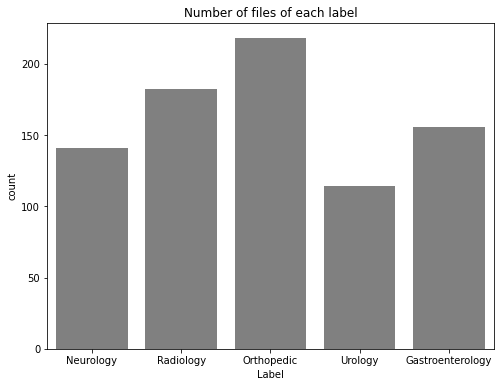

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data, color='gray')
plt.xlabel("Label")
plt.title("Number of files of each label")
plt.show()

In [ ]:
%pip install wordcloud
%pip install textwrap

In [ ]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from operator import index
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=700, height=630, background_color="#f8d5de",max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

# Transposing document term matrix
data_dtm=data_dtm.transpose()

# Plotting word cloud for each product
for text,label in enumerate(data_dtm.columns):
  generate_wordcloud(data_dtm[label],label)

In [ ]:
df_dtm.groupby('label').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

# Comparison of Models

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


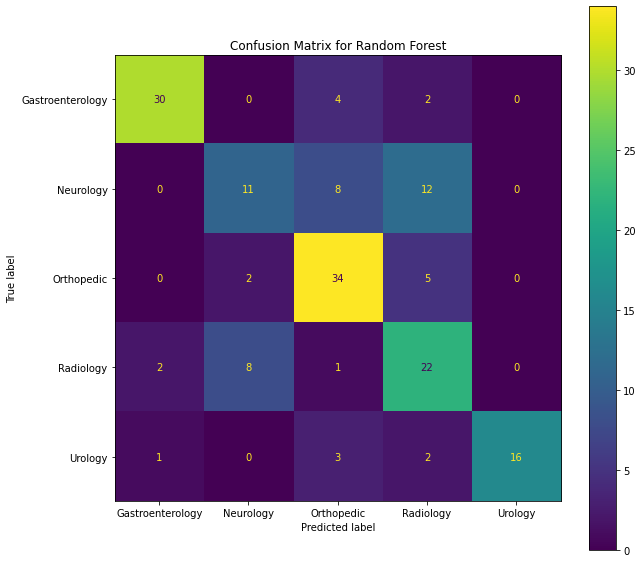

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


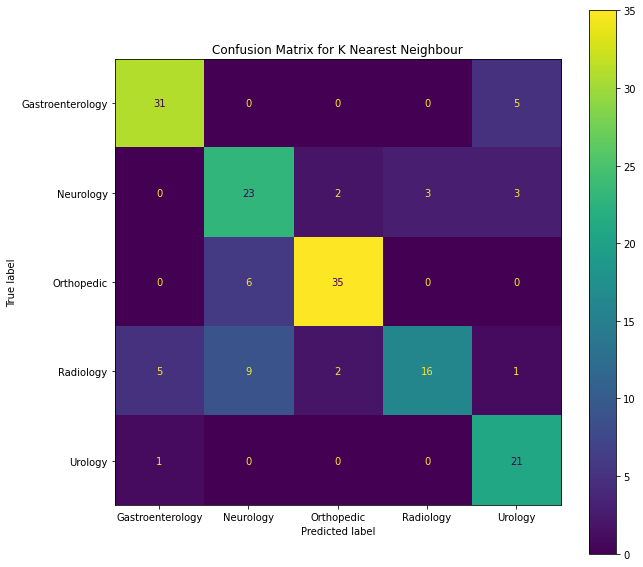

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


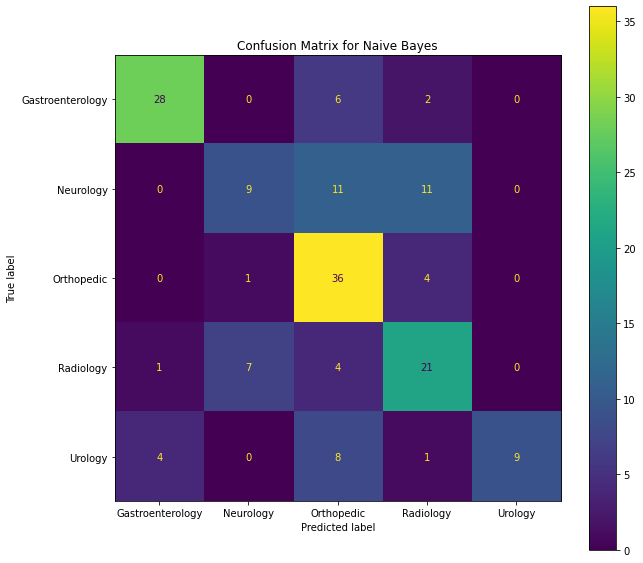

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


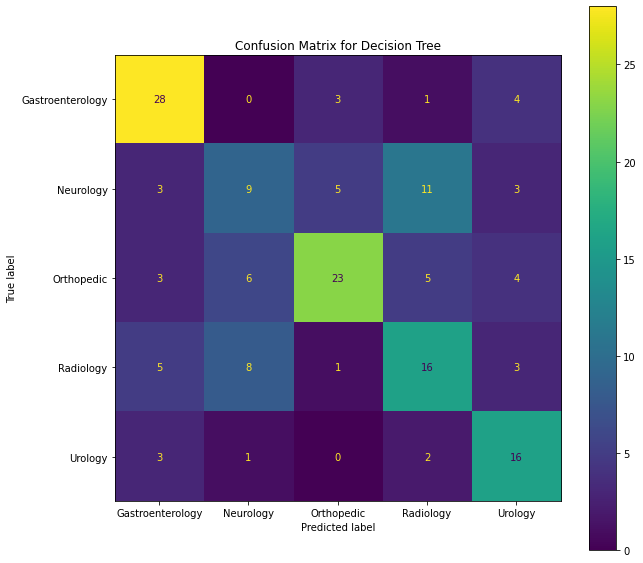

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


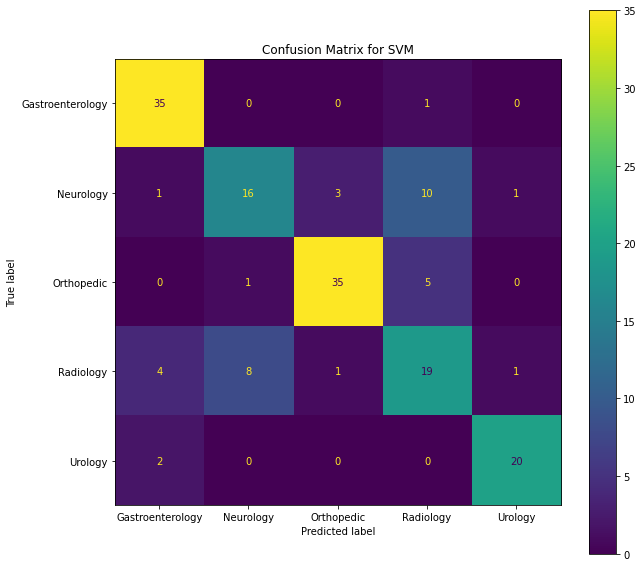

In [ ]:
#Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
fig, ax=plt.subplots(figsize=(10,10))
plot_confusion_matrix(model_randomForest, val_X, val_y, ax=ax)
plt.title("Confusion Matrix for Random Forest")
plt.show()
fig, ax=plt.subplots(figsize=(10,10))
plot_confusion_matrix(model_knn, val_X, val_y, ax=ax)
plt.title("Confusion Matrix for K Nearest Neighbour")
plt.show()
fig, ax=plt.subplots(figsize=(10,10))
plot_confusion_matrix(nb_model, val_X, val_y, ax=ax)
plt.title("Confusion Matrix for Naive Bayes")
plt.show()
fig, ax=plt.subplots(figsize=(10,10))
plot_confusion_matrix(model_decisionTree, val_X, val_y, ax=ax)
plt.title("Confusion Matrix for Decision Tree")
plt.show()
fig, ax=plt.subplots(figsize=(10,10))
plot_confusion_matrix(svm_model, val_X, val_y, ax=ax)
plt.title("Confusion Matrix for SVM")
plt.show()

In [ ]:
#Plotting ROC_AUC curve of the models
from sklearn.metrics import plot_roc_curve
fig,ax=plt.subplots(figsize=(10,5))
plot_roc_curve(model_randomForest, val_X, val_y, ax=ax, color='red', label='Random Forest')
plot_roc_curve(model_knn, val_X, val_y, ax=ax, color='blue', label="K-Nearest Neighbour")
plot_roc_curve(nb_model, val_X, val_y, ax=ax, color='green', label="Naive Bayes")
plot_roc_curve(model_decisionTree, val_X, val_y, ax=ax, color='pink', label="Decision Tree")
plot_roc_curve(svm_model, val_X, val_y, ax=ax, color='aqua', label="SVM")

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import plot_precision_recall_curve
def precision_recall(model, X):
  y = data.label
  onehotencoder = OneHotEncoder()
  y_hat = onehotencoder.fit_transform(y.reshape(-1,1)).toarray()
  #y = y.astype(np.uint8)
  n_classes = len(set(y_hat))

  Y = label_binarize(data.label, classes=[*range(n_classes)])

  X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y, test_size=0.2,
                                                    random_state = 42)

  clf = OneVsRestClassifier(model)
  clf.fit(X_train, y_train)

  y_score = clf.predict_proba(X_test)
  #pred=model.predict(val_X)

  # precision recall curve
  precision = dict()
  recall = dict()
  for i in range(n_classes):
      precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
      plt.plot(recall[i], precision[i], lw=2, label=label.format(i))

  plt.xlabel("recall")
  plt.ylabel("precision")
  plt.legend(loc="best")
  plt.title("precision vs. recall curve")
  plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve,roc_curve, auc, log_loss
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import OneHotEncoder
def plot_precision_recall_curve(X, y, _classifier):
    # keep the algorithm's name to be written down into the graph
    algor_name = type(_classifier).__name__

    # put y into multiple columns for OneVsRestClassifier
    onehotencoder = OneHotEncoder()
    y_hat = onehotencoder.fit_transform(y.reshape(-1,1)).toarray()
    n_classes = y_hat.shape[1]
# split train/test set
    X_train, X_test, y_train, y_test = train_test_split(X, y_hat, test_size = 0.2, random_state = 42)
# For each classifier, the class is fitted against all the other classes
    clf_ovr = OneVsRestClassifier(_classifier)
    clf_ovr.fit(X_train, y_train)
    y_proba = clf_ovr.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fig = plt.figure()
    plt.style.use('default')
    precision = dict()
    recall = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_proba[:, i])
        plt.plot(recall[i], precision[i], lw=2, label='PR Curve of class {}'.format(i))

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="lower right", prop={'size': 10})
    plt.title('Precision-Recall to multi-class: ')
    plt.suptitle(algor_name, fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
#precision_recall(nb_model, X_tfidf)
plot_precision_recall_curve(X_tfidf, y, model_randomForest)

In [ ]:
#Plotting Precision recall curve of the models
from sklearn.metrics import plot_precision_recall_curve
fig,ax=plt.subplots(figsize=(10,5))
plot_precision_recall_curve(model_randomForest, val_X, val_y, ax=ax, color='red', label='Random Forest')
plot_precision_recall_curve(model_knn, val_X, val_y, ax=ax, color='blue', label="K-Nearest Neighbour")
plot_precision_recall_curve(nb_model, val_X, val_y, ax=ax, color='green', label="Naive Bayes")
plot_precision_recall_curve(model_decisionTree, val_X, val_y, ax=ax, color='pink', label="Decision Tree")
plot_precision_recall_curve(svm_model, val_X, val_y, ax=ax, color='aqua', label="SVM")

In [ ]:
y.shape

(811, 5)

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output
y_new = label_binarize(y, classes=np.unique(y))
n_classes = y_new.shape[0]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=250, max_depth=25, min_samples_split=25, min_samples_leaf=6, random_state=1))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
#y_score_2=label_binarize(y, classes=np.unique(y))
n_classes = classes.shape[0]
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

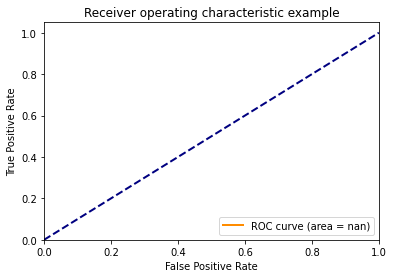

In [ ]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()